<a href="https://colab.research.google.com/github/C-Cruz-Jr/C-Cruz-Jr/blob/main/HW9_Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib as plt
import tensorflow.keras as keras
import tensorflow as tf

def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    return series[:, np.newaxis].astype(np.float32).reshape(batch_size, n_steps,1)

<Axes: >

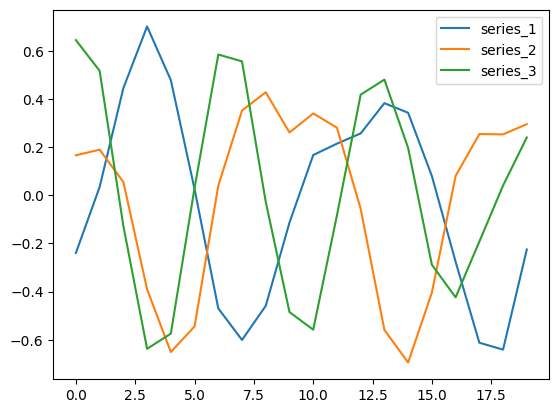

In [10]:
batch_size = 3
s = generate_time_series(batch_size, 20)

times_df = pd.DataFrame(s.reshape(batch_size,-1)).T
times_df.columns= ['series_' + str(x) for x in range(1,batch_size + 1)]
times_df.plot.line()

In [11]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [13]:
y_pred = X_valid[:, -1]
mse = tf.keras.losses.MeanSquaredError()
mse_value = mse(y_valid, y_pred).numpy()
print("MSE:", mse_value)

MSE: 0.020860713


In [14]:
import tensorflow as tf

model = keras.models.Sequential([
keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(1e-4), metrics = ['RootMeanSquaredError'])

history = model.fit(x=X_train, y=y_train, batch_size=32,epochs=15, validation_data=(X_valid, y_valid))

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - RootMeanSquaredError: 0.5755 - loss: 0.3312 - val_RootMeanSquaredError: 0.5589 - val_loss: 0.3123
Epoch 2/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - RootMeanSquaredError: 0.5657 - loss: 0.3201 - val_RootMeanSquaredError: 0.5454 - val_loss: 0.2975
Epoch 3/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - RootMeanSquaredError: 0.5467 - loss: 0.2989 - val_RootMeanSquaredError: 0.5316 - val_loss: 0.2825
Epoch 4/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - RootMeanSquaredError: 0.5322 - loss: 0.2833 - val_RootMeanSquaredError: 0.5173 - val_loss: 0.2676
Epoch 5/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - RootMeanSquaredError: 0.5211 - loss: 0.2715 - val_RootMeanSquaredError: 0.5027 - val_loss: 0.2528
Epoch 6/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - RootMeanSquaredError: 0.5015 - loss: 0.2515 - val_RootMeanSquaredError: 0.4878 - val_loss: 0.2379
Epoch 7/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - RootMeanSquaredError: 0.4851 - loss: 0.2353 

In [16]:
y_pred = model.predict(X_valid)
mse = tf.keras.losses.MeanSquaredError()
mse_value = mse(y_valid, y_pred).numpy()
print("MSE:", mse_value)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MSE: 0.12084665


In [19]:
y_pred = model.predict(X_test)
mse = tf.keras.losses.MeanSquaredError()
mse_value = mse(y_test, y_pred).numpy()
print("MSE:", mse_value)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MSE: 0.12603727


In [20]:
model = keras.models.Sequential([
keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None,
1]),
keras.layers.SimpleRNN(20, return_sequences=True),
keras.layers.SimpleRNN(1)
])

model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(1e-4), metrics = ['mean_squared_error'])

history = model.fit(x=X_train, y=y_train, batch_size=32,epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - loss: 0.1832 - mean_squared_error: 0.1832 - val_loss: 0.0384 - val_mean_squared_error: 0.0384
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.0190 - val_mean_squared_error: 0.0190
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - loss: 0.0138 - mean_squared_error: 0.0138 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_

In [23]:
y_pred = model.predict(X_valid)
mse = tf.keras.losses.MeanSquaredError()
mse_value = mse(y_valid, y_pred).numpy()
print("MSE:", mse_value)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
MSE: 0.0027467709


In [25]:
y_pred = model.predict(X_test)
mse = tf.keras.losses.MeanSquaredError()
mse_value = mse(y_test, y_pred).numpy()
print("MSE:", mse_value)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
MSE: 0.0026529657


In [26]:
forecast = 10
series = generate_time_series(3000, n_steps + forecast)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(forecast):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)
Y_pred = X[:, n_steps:]

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [28]:
mse = tf.keras.losses.MeanSquaredError()
mse_value = mse(Y_new, Y_pred).numpy()
print("MSE:", mse_value)

MSE: 0.021732267


<Axes: >

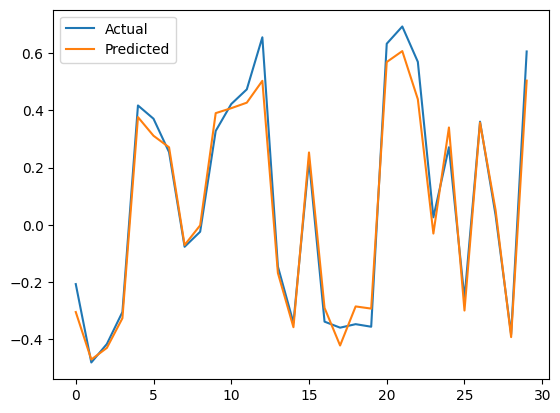

In [30]:
sample_indices = range(0, len(Y_new), 100)
Y_new_sample = Y_new.reshape(-1)[sample_indices]
Y_pred_sample = Y_pred.reshape(-1)[sample_indices]
times_df = pd.DataFrame({'Actual': Y_new_sample, 'Predicted': Y_pred_sample})
times_df.plot.line()

In [31]:
forecast = 10
series = generate_time_series(10000, n_steps + forecast)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -forecast:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -forecast:,0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -forecast:, 0]

In [32]:
Y_train.shape

(7000, 10)

In [33]:
model = keras.models.Sequential([
keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None,
1]),
keras.layers.SimpleRNN(20),
keras.layers.Dense(forecast)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(1e-4), metrics = ['mean_squared_error'])
history = model.fit(x=X_train, y=Y_train, batch_size=32,epochs=50, validation_data=(X_valid, Y_valid))

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - loss: 0.3572 - mean_squared_error: 0.3572 - val_loss: 0.1249 - val_mean_squared_error: 0.1249
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.1089 - mean_squared_error: 0.1089 - val_loss: 0.0771 - val_mean_squared_error: 0.0771
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0741 - mean_squared_error: 0.0741 - val_loss: 0.0589 - val_mean_squared_error: 0.0589
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0569 - mean_squared_error: 0.0569 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0474 - mean_squared_error: 0.0474 - val_loss: 0.0415 - val_mean_squared_error: 0.0415
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0409 - mean_squared_error: 0.0409 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0371 - mean_squared_error: 0.0371 - val_los

In [35]:
y_pred = model.predict(X_valid)
mse = tf.keras.losses.MeanSquaredError()
mse_value = mse(Y_valid, y_pred).numpy()
print(mse_value)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
0.010055687


In [36]:
y_pred = model.predict(X_test)
mse = tf.keras.losses.MeanSquaredError()
mse_value = mse(Y_test, y_pred).numpy()
print(mse_value)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
0.009869841


 Method 3: Treating Y as a sequence

In [37]:
forecast_steps = 10
Y = np.empty((10000, n_steps, forecast_steps)) # each target is a sequence of 10D vectors
for step_ahead in range(1, forecast_steps + 1):
    Y[:, :, step_ahead - 1] = series[:, step_ahead:step_ahead + n_steps,0]
    Y_train = Y[:7000]
    Y_valid = Y[7000:9000]
    Y_test = Y[9000:]

In [38]:
print(Y_train.shape)
print(Y_valid.shape)
print(Y_test.shape)

(7000, 50, 10)
(2000, 50, 10)
(1000, 50, 10)


In [39]:
Y_test[:, -1].shape

(1000, 10)

In [43]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

def last_time_step_mse(Y_true, Y_pred):
    return tf.reduce_mean(tf.square(Y_true[:, -1] - Y_pred[:, -1]))

optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="mse", optimizer=optimizer, metrics=[last_time_step_mse])

history = model.fit(x=X_train, y=Y_train, batch_size=32, epochs=100, validation_data=(X_valid, Y_valid))


Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - last_time_step_mse: 0.0714 - loss: 0.0801 - val_last_time_step_mse: 0.0257 - val_loss: 0.0402
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - last_time_step_mse: 0.0253 - loss: 0.0382 - val_last_time_step_mse: 0.0182 - val_loss: 0.0321
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - last_time_step_mse: 0.0203 - loss: 0.0329 - val_last_time_step_mse: 0.0169 - val_loss: 0.0302
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - last_time_step_mse: 0.0154 - loss: 0.0288 - val_last_time_step_mse: 0.0127 - val_loss: 0.0268
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - last_time_step_mse: 0.0128 - loss: 0.0263 - val_last_time_step_mse: 0.0105 - val_loss: 0.0240
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - last_time_step_mse: 0.0096 - loss: 0.0230 - val_last_time_step_mse: 0.0077 - val_loss: 0.0209
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - last_time_step_mse: 0.0087 - loss: 0.0215 

In [44]:
y_pred = model.predict(X_valid)
last_time_step_mse_value = tf.reduce_mean(tf.square(Y_valid[:, -1] - y_pred[:, -1])).numpy()
print(last_time_step_mse_value)

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step
0.006169541788385909


In [45]:
y_pred = model.predict(X_test)
np.mean(last_time_step_mse(Y_test, y_pred))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


0.006395319982300051